# DFT usando PySCF

Autor: [Prof. Elvis do A. Soares](https://github.com/elvissoares) 

Contato: [elvis@peq.coppe.ufrj.br](mailto:elvis@peq.coppe.ufrj.br) - [Programa de Engenharia Química, PEQ/COPPE, UFRJ, Brasil](https://www.peq.coppe.ufrj.br/)

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pyscf
from pyscf.tools import cubegen # para exportar aquivos cube

## Molécula de H2O

In [ ]:
H2Omol = pyscf.M(
    atom = '''
        O 0.000000 0.000000 0.000000
        H -0.000000 -0.760265 0.588373
        H 0.000000 0.760265 0.588373''',
    basis = 'cc-pVTZ', unit='Angstrom', verbose=0)

Energia da molécula

In [ ]:
mf = H2Omol.RKS()
#mf.xc = 'svwn' # shorthand for slater,vwn
#mf.xc = 'bp86' # shorthand for b88,p86
#mf.xc = 'blyp' # shorthand for b88,lyp
#mf.xc = 'pbe' # shorthand for pbe,pbe
#mf.xc = 'lda,vwn_rpa'
#mf.xc = 'b97,pw91'
#mf.xc = 'pbe0'
#mf.xc = 'b3p86'
#mf.xc = 'wb97x'
#mf.xc = '' or mf.xc = None # Hartree term only, without exchange
mf.xc = 'b3lyp'

mf.kernel()

mf.energy_tot()

In [ ]:
# electron density
cubegen.density(H2Omol, 'h2o_den.cube', mf.make_rdm1())

In [ ]:
# molecular electrostatic potential
cubegen.mep(H2Omol, 'h2o_pot.cube', mf.make_rdm1())

In [ ]:
# Exportanto os 8 primeiros orbitais moleculares
for i in range(8):
    cubegen.orbital(H2Omol, f'h2o_mo{i+1}.cube', mf.mo_coeff[:,i])
    print(f"MO {i+1} energy: {mf.mo_energy[i]*27.2114} eV")

Use o programa VESTA e compare com a figura abaixo. 

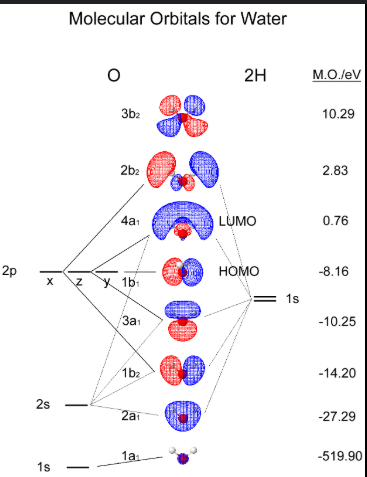

In [ ]:
# Orbital energies, Mulliken population etc.
mf.analyze()

## Molécula de Amônia (NH3)

In [ ]:
NH3mol = pyscf.M(
    atom = '''
      N 0.000000 0.000000 0.000000
      H 0.317512 0.715522 0.644188
      H 0.831500 -0.392048 -0.427401
      H -0.503881 0.479639 -0.737435''',
    basis = 'cc-pVTZ', unit='Angstrom', verbose=0)

Energia da molécula com geometria inicial

In [ ]:
mf = NH3mol.RKS(xc='b3lyp')
mf.kernel()

mf.energy_tot()

In [ ]:
# electron density
cubegen.density(NH3mol, 'nh3_den.cube', mf.make_rdm1())

In [ ]:
# molecular electrostatic potential
cubegen.mep(NH3mol, 'nh3_pot.cube', mf.make_rdm1())

In [ ]:
# Exportanto os 8 primeiros orbitais moleculares
for i in range(8):
    cubegen.orbital(NH3mol, f'nh3_mo{i+1}.cube', mf.mo_coeff[:,i])
    print(f"MO {i+1} energy: {mf.mo_energy[i]} a.u.")

## Molécula de Metano (CH4)

In [ ]:
CH4mol = pyscf.M(
    atom = '''
      C 0.000000 0.000000 0.000000
      H 0.529421 0.161311 0.937078
      H 0.205413 0.825020 -0.679390
      H 0.334993 -0.932557 -0.450049
      H -1.069827 -0.053774 0.192360''',
    basis = 'cc-pVTZ', unit='Angstrom', verbose=0)  

In [ ]:
mf = CH4mol.RKS(xc='b3lyp')
mf.kernel()

mf.energy_tot()

In [ ]:
# electron density
cubegen.density(CH4mol, 'ch4_den.cube', mf.make_rdm1())

In [ ]:
# molecular electrostatic potential
cubegen.mep(CH4mol, 'ch4_pot.cube', mf.make_rdm1())

In [ ]:
# Exportanto os 8 primeiros orbitais moleculares
for i in range(8):
    cubegen.orbital(CH4mol, f'ch4_mo{i+1}.cube', mf.mo_coeff[:,i])
    print(f"MO {i+1} energy: {mf.mo_energy[i]} a.u.")

## Molécula de Metanol (CH3OH)

In [ ]:
MetOHmol = pyscf.M(
   atom = '''
   C 0.000000 0.000000 0.000000
   H 0.524251 0.027980 0.953700
   H 0.294565 0.882661 -0.577498
   H 0.322128 -0.896385 -0.540456
   O -1.389390 -0.015402 0.293600
   H -1.875833 -0.040148 -0.534399''',
   basis = 'cc-pVTZ', unit='Angstrom', verbose=0)  

In [ ]:
mf = MetOHmol.RKS(xc='b3lyp')
mf.kernel()

mf.energy_tot()

In [ ]:
# electron density
cubegen.density(MetOHmol, 'metoh_den.cube', mf.make_rdm1())

In [ ]:
# molecular electrostatic potential
cubegen.mep(MetOHmol, 'metoh_pot.cube', mf.make_rdm1())

In [ ]:
# Exportanto os 10 primeiros orbitais moleculares
for i in range(10):
    cubegen.orbital(MetOHmol, f'metoh_mo{i+1}.cube', mf.mo_coeff[:,i])
    print(f"MO {i+1} energy: {mf.mo_energy[i]} a.u.")